# Data Wrangling Exercise with R

## 1. Install and Load Packages

In [1]:
install.packages("tidyverse") 
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# install.packages("ggplot2") 
# library(ggplot2)

## 2. Load Datasets from R packages

In [3]:
# check for available datasets
data()

### 2.1. Dataset 1: New York Air Quality Measurements Dataset

In [4]:
# inspect dataset1: check for data structure and any na's
data1 <- airquality
names(data1)
str(data1)
t(data1 %>% map(~sum(is.na(.))))

[1] "Ozone"   "Solar.R" "Wind"    "Temp"    "Month"   "Day"

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<int>,<int>,<int>,<int>
37,7,0,0,0,0


In [5]:
# replace na's with mean values, round meanvals for integer precision dtype

data1_avg <- data1 %>%
         summarise(Ozone=as.integer(round(mean(Ozone, na.rm=TRUE))),
                   Solar.R=as.integer(round(mean(Solar.R, na.rm=TRUE))),
                   Temp=as.integer(round(mean(Temp, na.rm=TRUE))),
                   Wind=mean(Wind, na.rm=TRUE))
       
data1_clean <- data1 %>% replace_na(list(Ozone=data1_avg$Ozone,
                                       Solar.R=data1_avg$Solar.R))

# check dataset1
glimpse(data1_clean)
t(data1_clean %>% map(~sum(is.na(.))))

Rows: 153
Columns: 6
$ Ozone   <int> 41, 36, 12, 18, 42, 28, 23, 19, 8, 42, 7, 16, 11, 14, 18, 14, …
$ Solar.R <int> 190, 118, 149, 313, 186, 186, 299, 99, 19, 194, 186, 256, 290,…
$ Wind    <dbl> 7.4, 8.0, 12.6, 11.5, 14.3, 14.9, 8.6, 13.8, 20.1, 8.6, 6.9, 9…
$ Temp    <int> 67, 72, 74, 62, 56, 66, 65, 59, 61, 69, 74, 69, 66, 68, 58, 64…
$ Month   <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Day     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…


Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0


In [6]:
head(data1_clean,3)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3


In [7]:
# subseting based on filter conditions
0.75*max(data1_clean$Ozone)
data1_clean %>% filter(Ozone >= 0.75*max(data1_clean$Ozone))

[1] 126

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
135,269,4.1,84,7,1
168,238,3.4,81,8,25


In [8]:
0.9*max(data1_clean$Wind)
data1_clean %>% filter(Wind >= 0.9*max(data1_clean$Wind))

[1] 18.63

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
8,19,20.1,61,5,9
37,284,20.7,72,6,17


In [9]:
data1_clean %>% 
  mutate(Feel=if_else(Temp<=mean(Temp), "cold", "warm")) %>% 
  mutate(Feel=as.factor(Feel)) %>%
  slice(70:73)

Ozone,Solar.R,Wind,Temp,Month,Day,Feel
<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
97,272,5.7,92,7,9,warm
85,175,7.4,89,7,10,warm
42,139,8.6,82,7,11,warm
10,264,14.3,73,7,12,cold


### 2.2. Dataset 2: Storm Tracks Dataset

In [11]:
# practice with dataset2: Storm tracks data
data2 <- storms 
str(data2)
t(data2 %>% map(~sum(is.na(.))))

tibble [19,066 × 13] (S3: tbl_df/tbl/data.frame)
 $ name                        : chr [1:19066] "Amy" "Amy" "Amy" "Amy" ...
 $ year                        : num [1:19066] 1975 1975 1975 1975 1975 ...
 $ month                       : num [1:19066] 6 6 6 6 6 6 6 6 6 6 ...
 $ day                         : int [1:19066] 27 27 27 27 28 28 28 28 29 29 ...
 $ hour                        : num [1:19066] 0 6 12 18 0 6 12 18 0 6 ...
 $ lat                         : num [1:19066] 27.5 28.5 29.5 30.5 31.5 32.4 33.3 34 34.4 34 ...
 $ long                        : num [1:19066] -79 -79 -79 -79 -78.8 -78.7 -78 -77 -75.8 -74.8 ...
 $ status                      : Factor w/ 9 levels "disturbance",..: 7 7 7 7 7 7 7 7 8 8 ...
 $ category                    : num [1:19066] NA NA NA NA NA NA NA NA NA NA ...
 $ wind                        : int [1:19066] 25 25 25 25 25 25 25 30 35 40 ...
 $ pressure                    : int [1:19066] 1013 1013 1013 1013 1012 1012 1011 1006 1004 1002 ...
 $ tropicalstorm_for

name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,14382,0,0,9512,9512


In [12]:
# check for unique values
unique(data2$category)  # more than half of data in category col are na's, hence replace 
                        # with mean (rounded up value) instead of dropping na's

meancat = as.integer(round(mean(data2$category, na.rm=TRUE)))
meanTSFD = as.integer(round(mean(data2$tropicalstorm_force_diameter, na.rm=TRUE)))
meanHFD = as.integer(round(mean(data2$hurricane_force_diameter, na.rm=TRUE)))

[1] NA  1  3  2  4  5

In [13]:
length(unique(data2$name))

[1] 258

In [14]:
data2_clean <- data2 %>%
                 replace_na(list(category=meancat,
                            tropicalstorm_force_diameter=meanTSFD,
                            hurricane_force_diameter=meanHFD))

In [15]:
t(data2_clean %>% map(~sum(is.na(.))))

name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
head(data2_clean,3)

name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>,<int>
Amy,1975,6,27,0,27.5,-79,tropical depression,2,25,1013,146,15
Amy,1975,6,27,6,28.5,-79,tropical depression,2,25,1013,146,15
Amy,1975,6,27,12,29.5,-79,tropical depression,2,25,1013,146,15


In [17]:
# count frequency of storm each month
t(as.data.frame(table(data2_clean$month)))

Var1,1,4,5,6,7,8,9,10,11,12
Freq,70,66,201,779,1603,4440,7509,3077,1109,212


In [18]:
# subset data for most frequent month and wind>=95%max value
data2_clean %>% 
  filter(month==9 & wind>=0.95*max(data2_clean$wind)) %>%
  arrange(wind)

name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>,<int>
Gilbert,1988,9,14,0,19.7,-83.8,hurricane,5,160,888,146,15
Dorian,2019,9,1,16,26.5,-77.0,hurricane,5,160,910,200,60
Dorian,2019,9,1,18,26.5,-77.1,hurricane,5,160,910,210,60


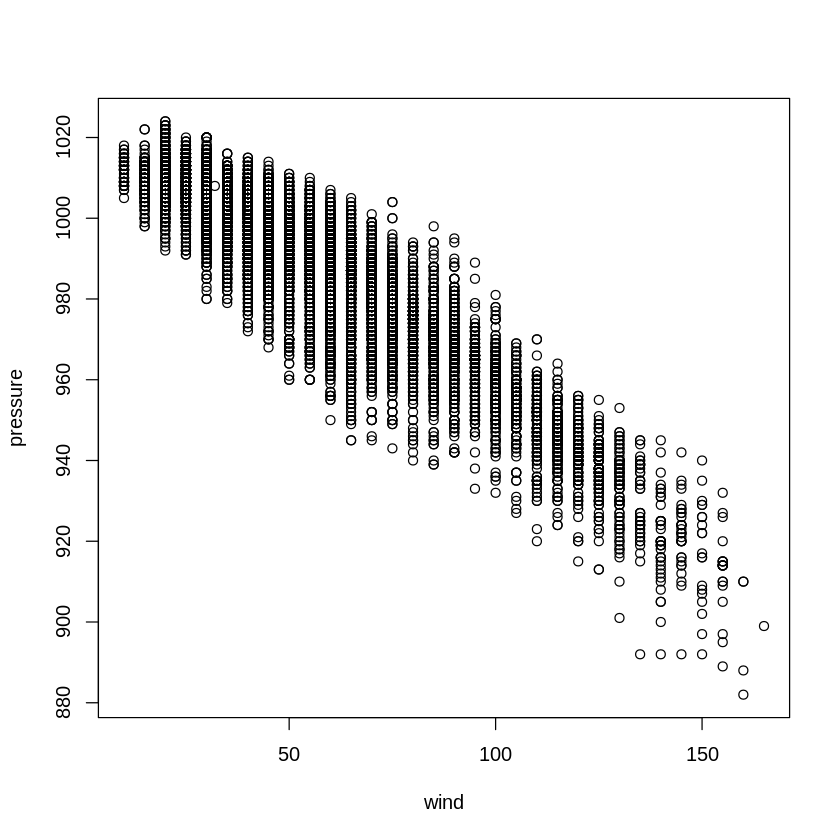

In [19]:
data2_clean %>%
  select(wind,pressure) %>%
  plot()


### 2.3. Dataset 3: Housing Sales in Texas

In [20]:
# practice with dataset3: Housing sales in TX
data3 <- txhousing 
glimpse(data3)
t(data3 %>% map(~sum(is.na(.))))

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


city,year,month,sales,volume,median,listings,inventory,date
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,568,568,616,1424,1467,0


In [21]:
names(data3)

[1] "city"      "year"      "month"     "sales"     "volume"    "median"   
[7] "listings"  "inventory" "date"

In [22]:
# calculate mean of all numeric columns grouped by city
cols_w_na <- c('sales','volume','median','listings','inventory')
mean <- data3 %>% group_by(city) %>%
  summarize(across(cols_w_na, ~mean(., na.rm = TRUE)) )

# sample 5 random rows to get mean values per group for cross-checking
mean[sample(nrow(mean),5),]

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(cols_w_na, ~mean(., na.rm = TRUE))`.
Caused by warning:
! Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(cols_w_na)

  # Now:
  data %>% select(all_of(cols_w_na))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


city,sales,volume,median,listings,inventory
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Paris,35.49733,3507688,84220.86,347.4405,10.165476
Tyler,248.43316,38605787,126891.98,2367.0802,9.810160
Nacogdoches,31.96023,4135532,115931.25,252.0756,8.374576
Midland,147.82143,32315265,189847.32,484.4775,3.444762
Corpus Christi,344.08602,51913888,127084.78,2309.2418,6.958791


In [23]:
# replace na's with mean values within city group
data3_clean <- data3 %>%
  group_by(city) %>%
  mutate(sales=case_when(is.na(sales) ~mean(sales,na.rm=TRUE), TRUE ~as.numeric(sales))) %>%
  mutate(volume=case_when(is.na(volume) ~mean(volume,na.rm=TRUE), TRUE ~as.numeric(volume))) %>%
  mutate(median=case_when(is.na(median) ~mean(median,na.rm=TRUE), TRUE ~as.numeric(median))) %>%
  mutate(listings=case_when(is.na(listings) ~mean(listings,na.rm=TRUE), TRUE ~as.numeric(listings))) %>%
  mutate(inventory=case_when(is.na(inventory) ~mean(inventory,na.rm=TRUE), TRUE ~as.numeric(inventory))) 
t(data3_clean %>% map(~sum(is.na(.))))


city,year,month,sales,volume,median,listings,inventory,date
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


In [24]:
# cross-check clean df with original df if columns contain na's
## clean df
head(data3_clean %>% filter(sales == mean$sales),3)
## original df
data3 %>% filter(city=='Kerrville' & date==2001.750)
data3 %>% filter(city=='Kerrville' & year==2005 & month==8)
data3 %>% filter(city=='Laredo' & year==2001 & month==12)

Warning message:
“There were 46 warnings in `filter()`.
The first warning was:
ℹ In argument: `sales == mean$sales`.
ℹ In group 1: `city = "Abilene"`.
Caused by warning in `sales == mean$sales`:
! longer object length is not a multiple of shorter object length
ℹ Run `dplyr::last_dplyr_warnings()` to see the 45 remaining warnings.”


city,year,month,sales,volume,median,listings,inventory,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Kerrville,2001,10,42.81928,8769464,165997.6,744.0122,19.265789,2001.750
Kerrville,2005,8,42.81928,8769464,165997.6,744.0122,19.265789,2005.583
Laredo,2001,12,81.34437,11998078,129051.0,606.5795,7.036364,2001.917


city,year,month,sales,volume,median,listings,inventory,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Kerrville,2001,10,NA,NA,NA,NA,NA,2001.75


city,year,month,sales,volume,median,listings,inventory,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Kerrville,2005,8,NA,NA,NA,NA,NA,2005.583


city,year,month,sales,volume,median,listings,inventory,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Laredo,2001,12,NA,NA,NA,NA,NA,2001.917


In [25]:
data3_clean[sample(nrow(data3_clean),5),]

city,year,month,sales,volume,median,listings,inventory,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nacogdoches,2002,4,30,3430000,110000,252.0756,8.374576,2002.250
San Antonio,2013,6,2388,521027508,177800,9581.0000,5.100000,2013.417
Montgomery County,2010,11,438,102622935,178100,3712.0000,7.500000,2010.833
Austin,2013,6,2970,880058970,234100,6724.0000,2.900000,2013.417
Midland,2008,6,161,33035000,179500,332.0000,2.100000,2008.417


## 3. Basic Visualization with ggplot
Grammars of graphics in R ggplot package: 
* Data: variables to plot
* Mapping: asetetchics on canvas (x, y, colors, shape, size, etc)
* Geometry: line, bar, histogram, etc

ggplot package for visualization can be called directly or via pipe.

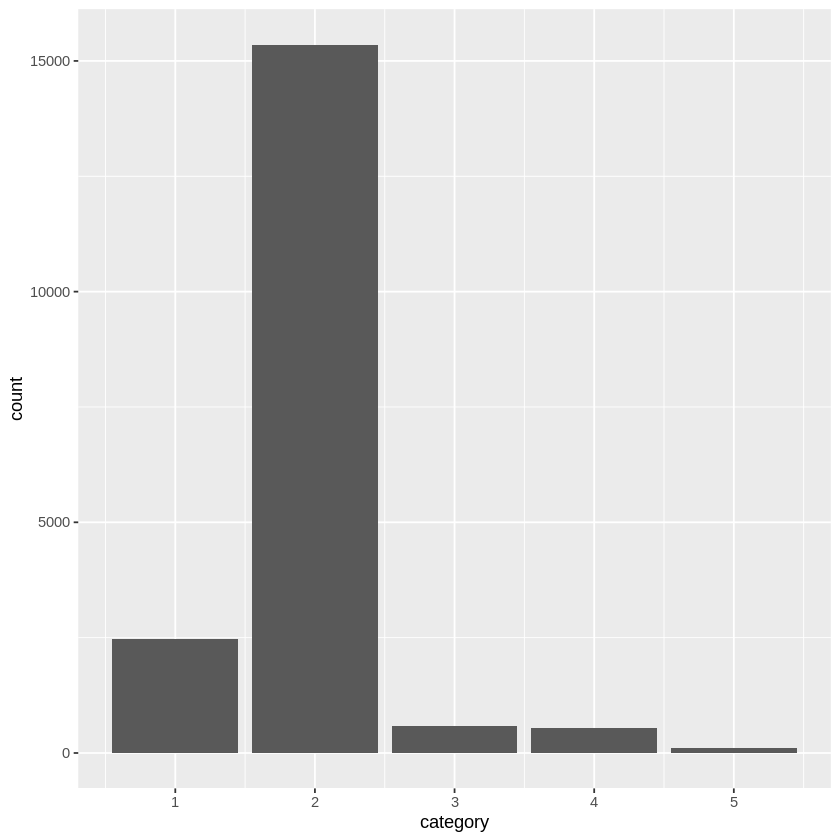

In [26]:
# Barplot of storm data by category
ggplot(data=data2_clean, mapping=aes(x=category)) + geom_bar()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


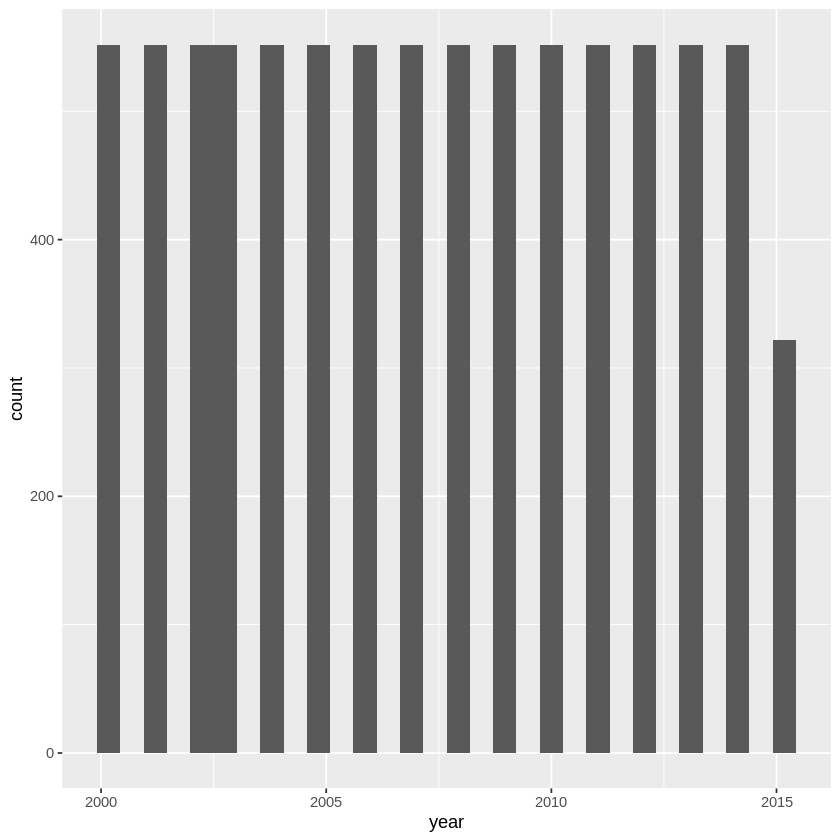

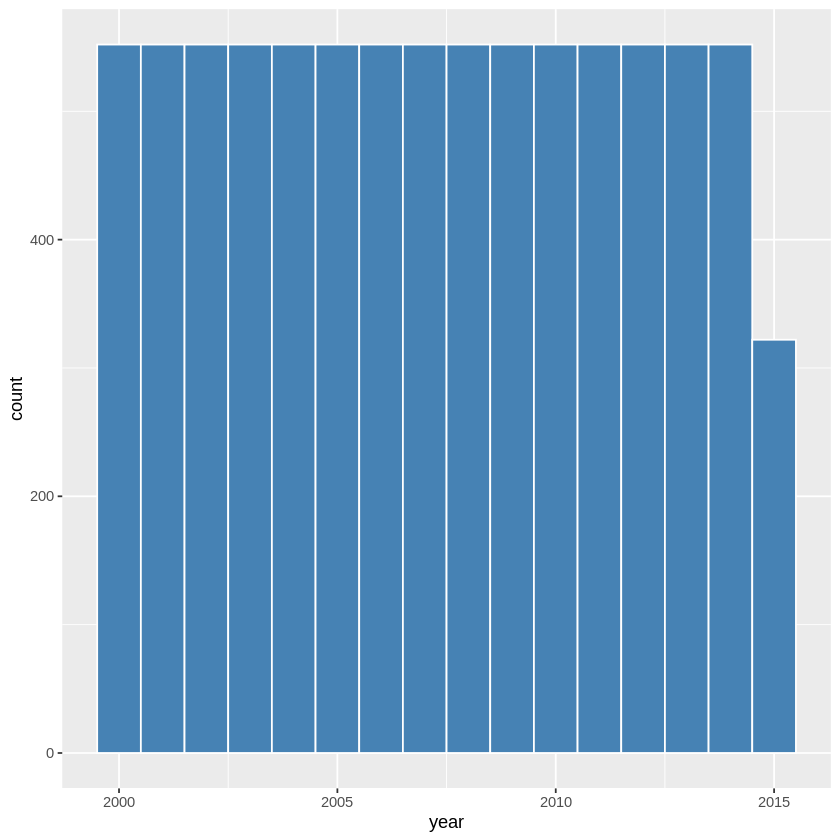

In [27]:
# Histogram plot of Texas housing sales by year with pipe vs with variables:

data3 %>% 
  drop_na(year) %>%
  ggplot(mapping=aes(x=year)) + geom_histogram()

ggplot(data=data3_clean, mapping=aes(x=year)) + geom_histogram(bins=16, color="white", fill="steelblue")

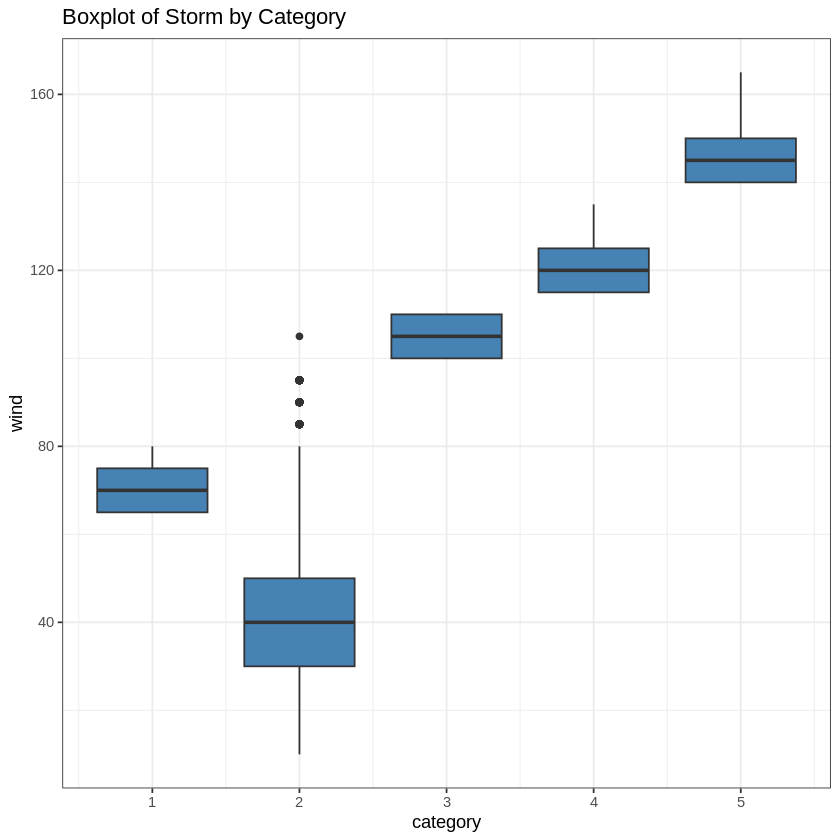

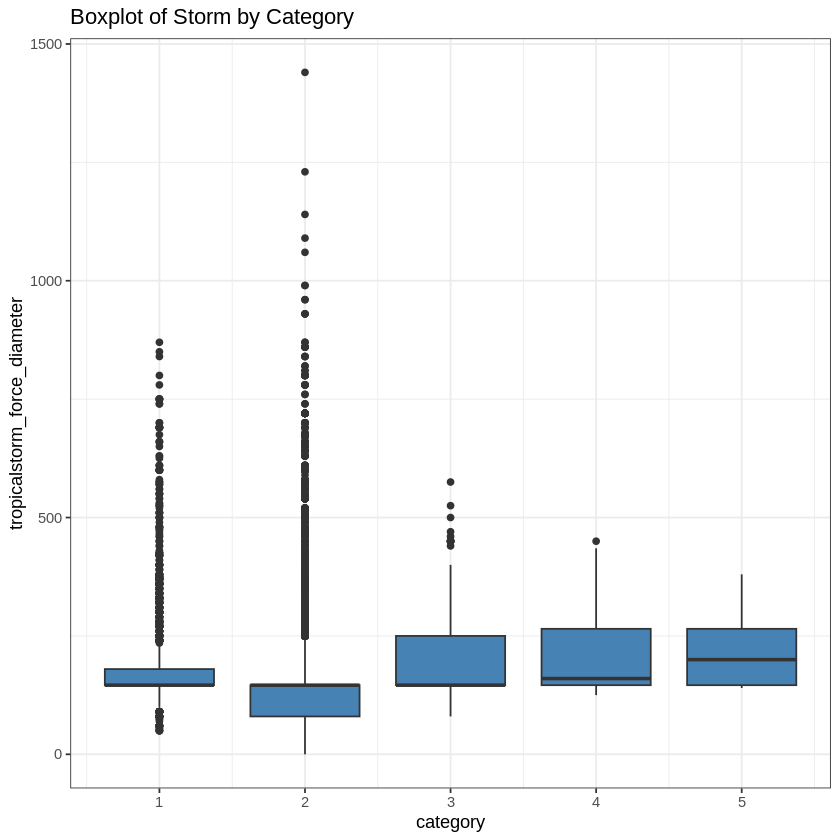

In [28]:
# Box plot of Storm wind and force_diameter by category
ggplot(data2_clean, mapping=aes(group=category, x=category, y=wind)) + 
  geom_boxplot(fill="steelblue") +
  theme_bw() +
  labs(title="Boxplot of Storm by Category", X="Category")
ggplot(data2_clean, mapping=aes(group=category, x=category, y=tropicalstorm_force_diameter)) + 
  geom_boxplot(fill="steelblue") +
  theme_bw() +
  labs(title="Boxplot of Storm by Category", X="Category")

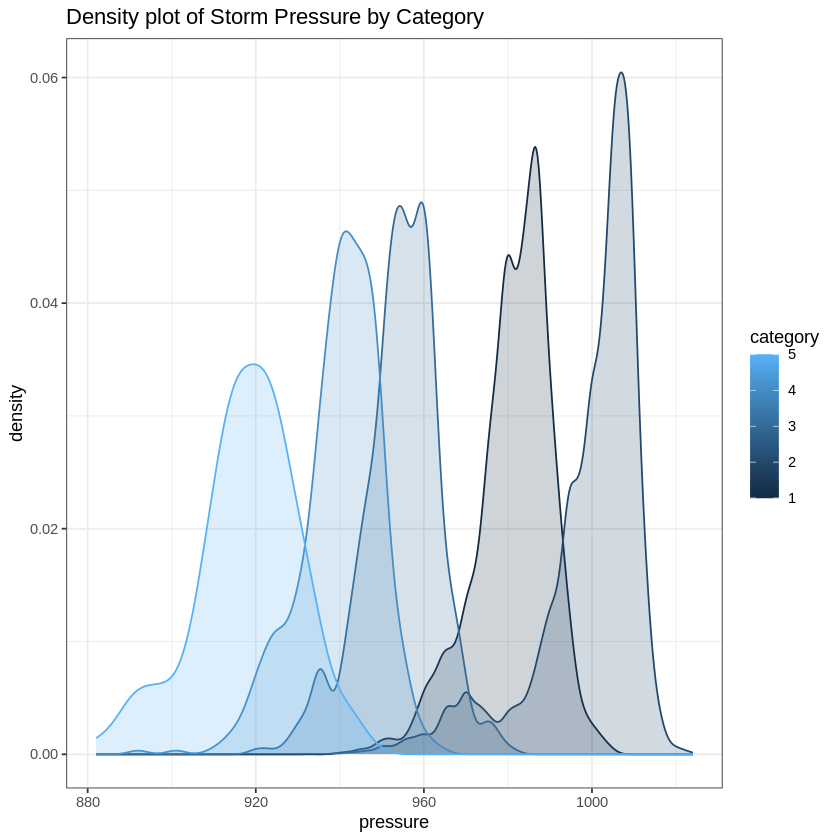

In [29]:
# density plot of storm pressure by category
data2_clean %>%
  ggplot(mapping=aes(group=category, x=pressure, color=category, fill=category)) + 
  geom_density(alpha=0.2) +
  theme_bw() +
  labs(title="Density plot of Storm Pressure by Category")

In [30]:
# check unique values of city cols
unique(data3_clean$year)
unique(data3_clean$city)

[1] 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
[16] 2015

[1] "Abilene"               "Amarillo"              "Arlington"            
 [4] "Austin"                "Bay Area"              "Beaumont"             
 [7] "Brazoria County"       "Brownsville"           "Bryan-College Station"
[10] "Collin County"         "Corpus Christi"        "Dallas"               
[13] "Denton County"         "El Paso"               "Fort Bend"            
[16] "Fort Worth"            "Galveston"             "Garland"              
[19] "Harlingen"             "Houston"               "Irving"               
[22] "Kerrville"             "Killeen-Fort Hood"     "Laredo"               
[25] "Longview-Marshall"     "Lubbock"               "Lufkin"               
[28] "McAllen"               "Midland"               "Montgomery County"    
[31] "Nacogdoches"           "NE Tarrant County"     "Odessa"               
[34] "Paris"                 "Port Arthur"           "San Angelo"           
[37] "San Antonio"           "San Marcos"            "Sherman-Denison"      
[40] "South Padre Island"    "Temple-Belton"         "Texarkana"            
[43] "Tyler"                 "Victoria"              "Waco"                 
[46] "Wichita Falls"

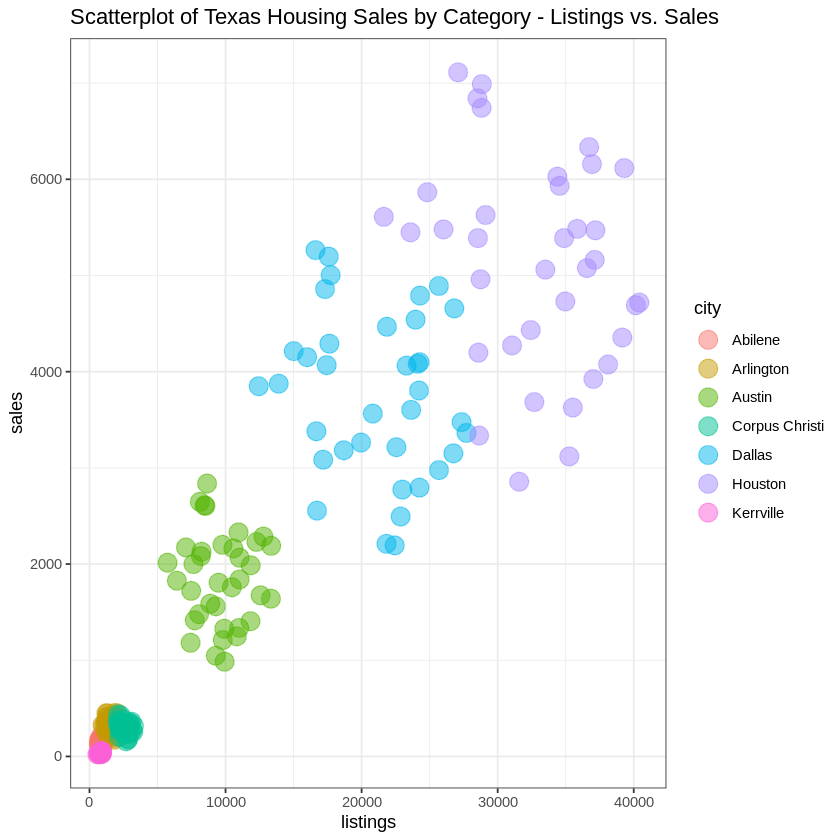

In [31]:
# Scatter plot of Texas Housing Sales (Listings vs. Sales) by city
 city_to_plot <- c('Arlington','Abilene','Austin','Houston','Corpus Christi','Dallas','Kerrville')
 year_to_plot <- c(2010,2011,2012)
 
 data3_clean %>% 
  filter(year %in% year_to_plot, city %in% city_to_plot) %>% 
  ggplot(mapping=aes(group=city, x=listings, y=sales, color=city)) + 
  geom_point(size=5,alpha=0.5) +
  theme_bw() +
  labs(title="Scatterplot of Texas Housing Sales by Category - Listings vs. Sales")


## 4. References:
1. https://www.youtube.com/watch?v=eR-XRSKsuR4&list=PPSV
2. https://www.youtube.com/watch?v=6fEowYTlNT8
3. https://r4ds.hadley.nz/